AUTHOR: Sierra Janson

DATE:   05/09/2024

# Setting up ✅

In [ ]:
import torch
from torch import nn
from torch.optim import *
import numpy as np
import matplotlib.pyplot as plt
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
torch.cuda.empty_cache()

Student Class 🤓

In [ ]:
class Student(nn.Module):
    def __init__(self,neurons: int=2,optimizer="Adam",lossfunc="MSE", activationfunc="sigmoid"):
        super().__init__()
        if activationfunc=="relu":
          self.activationfunc = nn.ReLU()
        else:
          self.activationfunc = nn.Sigmoid()
        self.layers=nn.Sequential(
            nn.Linear(1,neurons),self.activationfunc,nn.Linear(neurons,1)
        )

        if optimizer=="Adam":
            self.optimizer= Adam(self.parameters())
        elif optimizer=="SGD":
            self.optimizer= SGD(self.parameters())
        elif optimizer=="Adagrad":
            self.optimizer= Adagrad(self.parameters())
        elif optimizer=="Adamax":
            self.optimizer= Adamax(self.parameters())
        else:
            print(f"💀 Error! Unknown Optimizer '{optimizer}'")
            raise NameError
        if lossfunc=="MSE":
            self.loss= nn.MSELoss()
        elif lossfunc=="Gaussian":
            self.loss= nn.GaussianNLLLoss()
        elif lossfunc=="MAE":  ##MAE is mean absolute error
            self.loss= nn.L1Loss()
        else:
            print("💀 Error! Unknown Loss Functions '{lossfunc}'")
            raise NameError

    def loss_func(self, y_pred, Y):
      return self.loss(Y, y_pred)

    def predict(self, x):
      return self.forward(x)

    def active_learning_fit(self, loss):
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def forward(self,x):
        return self.layers(x)

Training Constants 🪨

In [ ]:
NUM_POLYNOMIALS = 3
NUM_COORDINATES = 500
NUM_NEURONS = 3
LOSS_FUNCTION = "MSE"
EPOCHS = 2500
TESTS = 3
ACTIVATION_FUNCTIONS = ["relu","sigmoid"]
OPTIMIZERS = ["Adam","SGD","Adagrad","Adamax"]
NUM_GROUPS = 3
STUDENTS = 60

assert(STUDENTS% NUM_GROUPS == 0)
assert(STUDENTS > 0 and NUM_GROUPS > 0)


Training Data Generating Functions 💻

In [ ]:
def concept(x, num):
    if num == 0:
        return 4*x-4*x**2
    elif num == 1:
        return x**2
    else:
        return x*(3*x-2)**2

def gen_coordinates(assignment, X):
    Y = concept(X, assignment).astype(np.double)
    return Y

# RANDOMLY GENERATED X COORDS
# !!!!!!!! UNIFORM
np.random.seed(3)
X = np.random.rand(NUM_COORDINATES, 1).astype(np.double)       # MEMORIZATION
X_TEST = np.random.rand(NUM_COORDINATES, 1).astype(np.double)  # CRITICAL THINKING


Training Function 🏋

In [ ]:
def training_func(student, assignment, X_learn, EPOCHS=1000):
    Y_learn=gen_coordinates(assignment, X_learn)
    X = torch.tensor(X_learn,dtype=torch.float32).to(device)
    Y = torch.tensor(Y_learn,dtype=torch.float32).to(device)
    EPOCH_ARR=[]
    LOSS_ARR=[]
    for i in range(EPOCHS):
        loss = student.fit(X,Y)
        EPOCH_ARR.append(i);
        LOSS_ARR.append(loss);
    return [EPOCH_ARR,LOSS_ARR]

In [ ]:
val = torch.tensor([0.1,0.3],[2.0,4.0], requires_grad=True)
targets = torch.tensor([1, 0])
model = nn.Linear(2, 2)


# Commence Training 🛫

In [ ]:
  """
  split students into num group

  call prediction(x)
  call loss_func(y_pred, Y)
  then passes averaged loss to active_learning_fit, of where the loss is returned
  """
# def polynomial_optimizer_test_training(LOSS_FUNCTION, NUM_NEURONS, ACTIVATION_FUNCTION, NUM_GROUPS):
losses = []
trained_models = []

students = []
for i in range(0,STUDENTS):
    students.append(Student(NUM_NEURONS,"Adam","MSE", "sigmoid").to(device))

Y_learn=gen_coordinates(1, X)
X_ = torch.tensor(X,dtype=torch.float32).to(device)
Y = torch.tensor(Y_learn,dtype=torch.float32).to(device)

for i in range(0,STUDENTS,3):
    mini_loss = [0,0,0]
    for j in range(EPOCHS):
        loss_sum = 0
        for k in range(NUM_GROUPS):
          pred = students[i+k].predict(X_)
          val = (students[i+k].loss_func(pred, Y))#.item()
          print(type(val))
          print(val)
    #     loss_sum /= NUM_GROUPS
    # for k in range(NUM_GROUPS):
    #    mini_loss[k] += students[i+k].active_learning_fit(torch.tensor(loss_sum,dtype=torch.float32).to(device))
    # # losses.append(mini_loss)

<class 'torch.Tensor'>
tensor(0.0829, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0771, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0932, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0829, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0771, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0932, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0829, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0771, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0932, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0829, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0771, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0932, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0829, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0771, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(0.0932, grad_fn=<MseLossBackward0>)
<class 'to

KeyboardInterrupt: 

# Assessment and Evaluation 🍎

*   List item
*   List item



Grading Function

In [ ]:
def grading(Y_pred, Y_actual):
  return (1/(len(Y_pred)))*np.sum((Y_pred - Y_actual)**2)

Plotting ↗

In [ ]:

def plot_tests(trained_models, num_column_groups, column_phase):
  gradebook = []

  # ITERATING THROUGH TRAINED STUDENTS
  for count in range(0, len(trained_models), TESTS):
    polynomial = count//(len(OPTIMIZERS)*TESTS)
    optimizer = count%len(OPTIMIZERS) + column_phase

    actual_Y = concept(X, polynomial).astype(np.double)
    actual_Y_new_critical = concept(X_TEST, polynomial).astype(np.double)

    X_tensor_new_critical = torch.tensor(X_TEST,dtype=torch.float32).to(device);
    X_tensor = torch.tensor(X,dtype=torch.float32).to(device);
    for j in range(TESTS):
        Y = trained_models[count+j](X_tensor);                           # predictions for each model
        Y_critical = trained_models[count+j](X_tensor_new_critical);

        Y_nd_critical = Y_critical.detach().numpy();
        Y_nd = Y.detach().numpy();
        X_nd = X_tensor.detach().numpy();
        gradebook.append([grading(Y_nd,actual_Y), grading(Y_nd_critical, actual_Y_new_critical)]);

        ax[polynomial,optimizer].plot(X_nd, Y_nd, 'x');

    # PLOTTING PREDICTED ----------- #
    ax[polynomial,optimizer].title.set_text(OPTIMIZERS[count%len(OPTIMIZERS)]);
    # PLOTTING ACTUAL -------------- #
    ax[polynomial,optimizer].plot(X_nd, actual_Y, 'rx');
    ax[polynomial,optimizer].set_ylim(bottom=0,top=1);
  return gradebook

# Testing ReLU vs Sigmoid


In [ ]:
relu_results = polynomial_optimizer_test_training(LOSS_FUNCTION,NUM_NEURONS,"relu")
sigmoid_results = polynomial_optimizer_test_training(LOSS_FUNCTION,NUM_NEURONS,"sigmoid")

[[0.0006424811172646681, 0.0007482214509209982],
 [0.0004928425345875328, 0.0005955024651753037],
 [0.07658338468566936, 0.08187341287364734],
 [0.08548590652071376, 0.08822721327758953],
 [0.08451188419154562, 0.0869510737040251],
 [0.08764094313103508, 0.08704889968672726],
 [0.08097045189017138, 0.08290119565330144],
 [0.08481024041774003, 0.08768575282582163],
 [0.0845100864182894, 0.0877441212454887],
 [0.00013283873814393376, 0.00014803170354462557],
 [0.0005538532932517295, 0.0006363792834075783],
 [0.002909905487417864, 0.003603636343253574],
 [0.0022282096221197733, 0.0023235221008940403],
 [0.0003092093595206298, 0.0003126357669459199],
 [0.0021148636124848678, 0.0022409060161620465],
 [0.07648028294865922, 0.08413840233012798],
 [0.07723372700964444, 0.08435273121637948],
 [0.08713934651171258, 0.09554789017036798],
 [0.06866458259066663, 0.07512137848194857],
 [0.005718703519165041, 0.005900330704346015],
 [0.016450139596687636, 0.018595115226054396],
 [2.581450230357317e-0

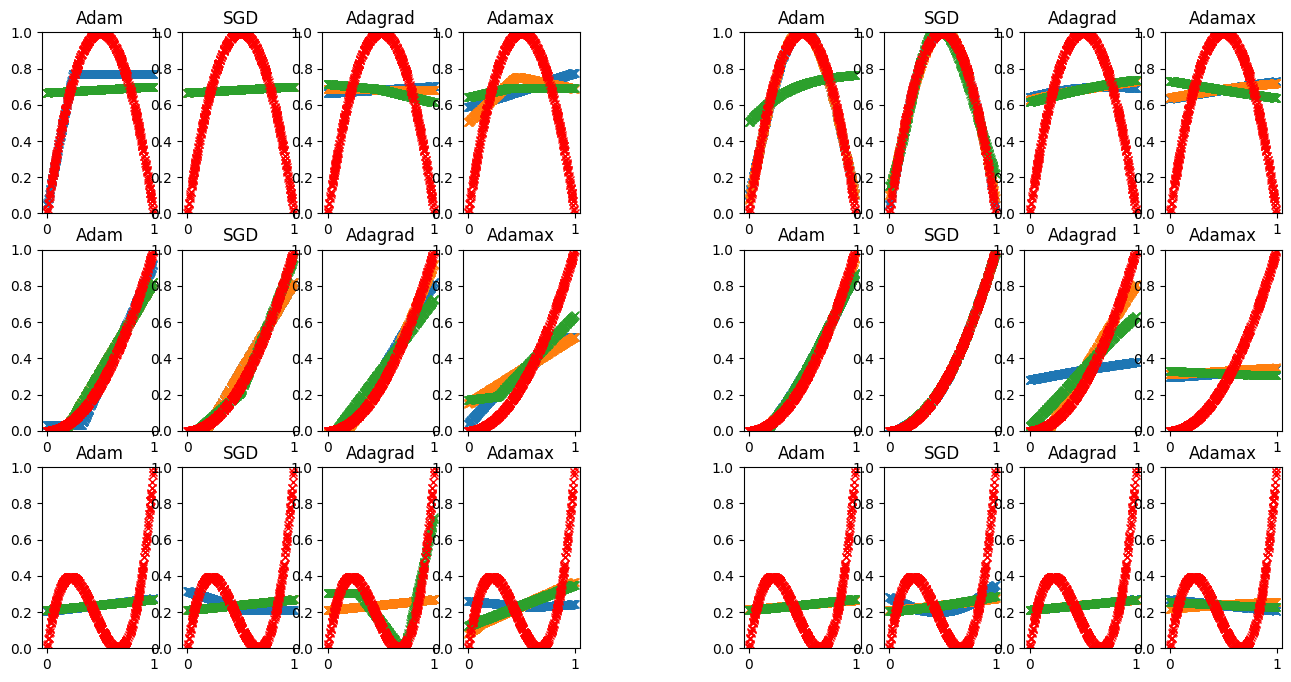

In [ ]:
fig, ax = plt.subplots(
    NUM_POLYNOMIALS,len(OPTIMIZERS) * len(ACTIVATION_FUNCTIONS)+1,
    figsize=(16,8),
    )
for i in range(3):
  ax[i][4].axis("off")

plot_tests(relu_results["trained_models"], len(ACTIVATION_FUNCTIONS), 0)
plot_tests(sigmoid_results["trained_models"], len(ACTIVATION_FUNCTIONS), 5)

# Testing Different Numbers of Neurons in the Hidden Layer

[[0.007061796355430767, 0.00896523179687641],
 [0.013296580041584275, 0.012715726485408307],
 [0.025031689856691266, 0.026009411333512228],
 [0.07684457140104294, 0.07709094369650955],
 [0.087847313606718, 0.09224317140340335],
 [0.08932451428540288, 0.09566324559864452],
 [0.08574308564306717, 0.08737824916518079],
 [0.030996033922100274, 0.034933295121956295],
 [0.08727646345714371, 0.0865849638849817],
 [0.006020847588803139, 0.006264253217062768],
 [0.003906522920191197, 0.00398118746928443],
 [0.08574306963025466, 0.08738624838286796],
 [0.005358942026013012, 0.00546164197490972],
 [0.00410058899670305, 0.004217331426953246],
 [0.005379130702302163, 0.0055379679534551295],
 [0.04251752234657121, 0.04609413076545544],
 [0.06069414272511268, 0.06639494177320288],
 [0.06148112096972808, 0.06658568988808478],
 [0.006135288419292817, 0.006810400801464448],
 [0.0006650158673079691, 0.0008250060121275195],
 [0.006758128696941537, 0.007583870390463648],
 [6.865339253483562e-05, 8.03429108

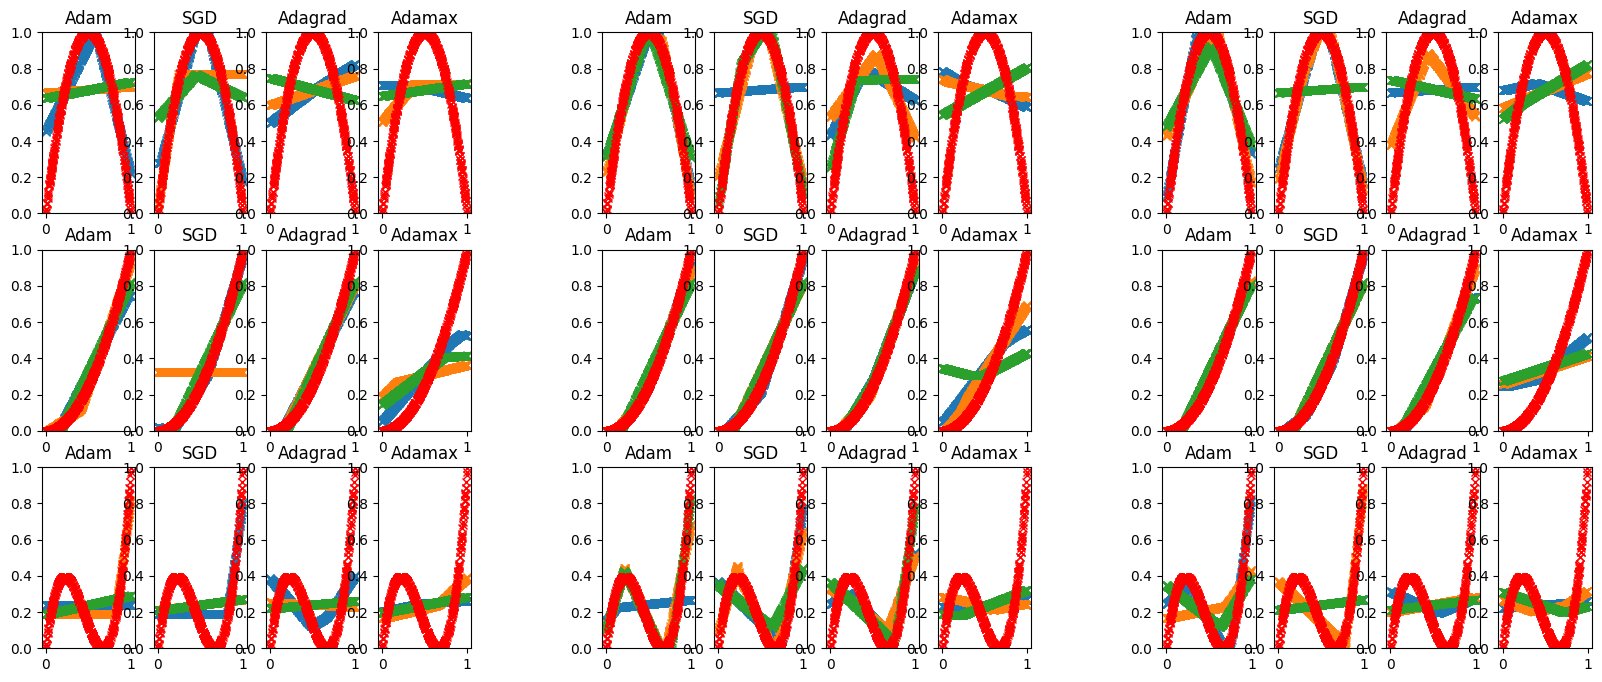

In [ ]:
relu_3_neurons = polynomial_optimizer_test_training(LOSS_FUNCTION,3,"relu")
relu_10_neurons= polynomial_optimizer_test_training(LOSS_FUNCTION,10,"relu")
relu_5_neurons = polynomial_optimizer_test_training(LOSS_FUNCTION,5,"relu")

num_column_groups = 3 # three tests
num_spacers = num_column_groups - 1
fig, ax = plt.subplots(
    NUM_POLYNOMIALS,len(OPTIMIZERS)*num_column_groups +num_spacers,
    figsize=(20,8),
    )

# spacers
for i in range(3):
  ax[i][4].axis("off")
  ax[i][9].axis("off")

plot_tests(relu_3_neurons["trained_models"], num_column_groups, 0)
plot_tests(relu_10_neurons["trained_models"], num_column_groups, 5)
plot_tests(relu_5_neurons["trained_models"], num_column_groups, 10)


Commence Grading 💯

In [ ]:
# create grading function to evaluate how far predicted points are from actual points

# assessing critical thinking (interpolation)
# assessing memory (memorization of points)

import numpy as np

# grading system
# 0.000 --> 100%
# 0.005 --> 90%
# 0.010 --> 80%
# 0.020 --> 70%
# 0.050 --> 50%

# mapping of grade to loss
# in the interval btwn 0.005 and 0.01
# subtract 0.005 until number is btwn 0.000 and 0.005
# if this count exceeds 9 they've failed
# find percentage of loss system out of 0.005 & subtract from 1
# add .50 + count * .10
def calc_letter_grade(mean_loss):
  count = 0
  if mean_loss >= 0.1:
    return 0
  while (mean_loss > 0.005):
    mean_loss -= 0.005
    count += 1
  ratio = (mean_loss/0.005)*.1
  return 1 - ratio - count*.1*.5

memory_letter_grade = []
critical_letter_grade = []


# NEED TO FIX ARRANGEMENT OF TEXTUAL OUTPUT........make more clear what output matches which graph!!- -----------------------------------------------------------!!!!

# MEMORY GRADE
print("Performance of student memorization of the material: ")
print()
for i in range(len(gradebook)):
  print(f"\tTEST {i%TESTS+1}: This student got an {calc_letter_grade(np.mean(gradebook[i][0]))*100:.2f}%")
  memory_letter_grade.append(calc_letter_grade(np.mean(gradebook[i][0]))*100)
  if (i%TESTS == 2):
    print()

# CRITICAL THINKING GRADE
print("Performance of student understanding of the concept: ")
print()
for i in range(len(gradebook)):
  print(f"\tTEST {i%TESTS+1}: This student got an {calc_letter_grade(np.mean(gradebook[i][1]))*100:.2f}%")
  critical_letter_grade.append(calc_letter_grade(np.mean(gradebook[i][1]))*100)
  if (i%TESTS == 2):
    print()

# # Define your points
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([2, 3, 5, 7, 11])
# coefficients = np.polyfit(x, y, 4)
# polynomial = np.poly1d(coefficients)


Performance of student memorization of the material: 

	TEST 1: This student got an 13.64%
	TEST 2: This student got an 99.42%
	TEST 3: This student got an 10.73%

	TEST 1: This student got an 7.77%
	TEST 2: This student got an 9.53%
	TEST 3: This student got an 9.13%

	TEST 1: This student got an 9.90%
	TEST 2: This student got an 6.05%
	TEST 3: This student got an 6.87%

	TEST 1: This student got an 74.65%
	TEST 2: This student got an 88.25%
	TEST 3: This student got an 62.91%

	TEST 1: This student got an 98.09%
	TEST 2: This student got an 99.40%
	TEST 3: This student got an 99.46%

	TEST 1: This student got an 19.17%
	TEST 2: This student got an 2.65%
	TEST 3: This student got an 9.78%

	TEST 1: This student got an 91.41%
	TEST 2: This student got an 94.08%
	TEST 3: This student got an 57.01%

	TEST 1: This student got an 99.94%
	TEST 2: This student got an 99.93%
	TEST 3: This student got an 99.95%

	TEST 1: This student got an 55.17%
	TEST 2: This student got an 53.02%
	TEST 3: 

(array([8., 3., 0., 0., 0., 8., 4., 2., 2., 9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

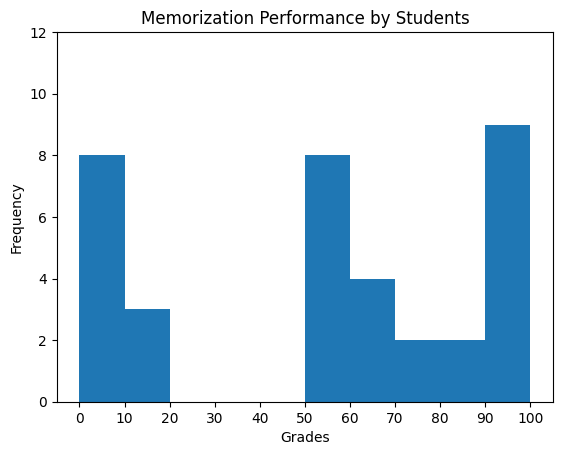

In [ ]:
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel("Grades")
plt.ylim(0,NUM_POLYNOMIALS*len(OPTIMIZERS))
plt.ylabel("Frequency")
plt.title("Memorization Performance by Students")
plt.hist(memory_letter_grade,bins=[0,10,20,30,40,50,60,70,80,90,100])

(array([8., 3., 0., 0., 0., 8., 4., 2., 2., 9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

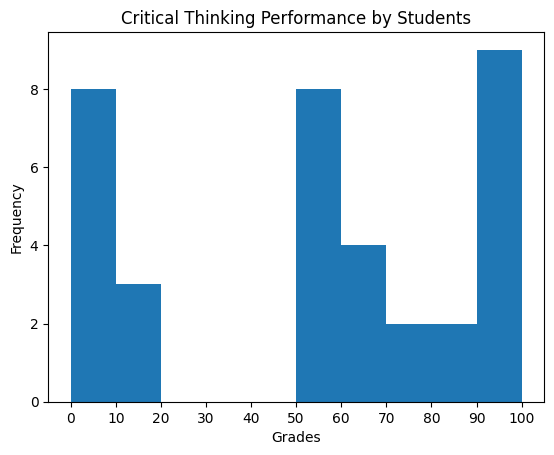

In [ ]:
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.title("Critical Thinking Performance by Students")
plt.hist(critical_letter_grade,bins=[0,10,20,30,40,50,60,70,80,90,100])